1. Train a single perceptron to learn two classes with two inputs x1 and x2. 

Assume that all the weights of the perceptron are initialized as 0, learning rate as 1. 

Show the calculation for each step. Plot all the samples and final decision boundary.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
data = [[0.5, 3.0, 2], [1, 3.0, 2], [0.5, 2.5, 2], [1, 2.5, 2], [1.5, 2.5, 2], [4.5, 1, 1], [5, 1, 1], [4.5, 0.5, 1], [5.5, 0.5, 1]]
data1 = np.array(data)
a = np.array([0, 0, 0])

trans_data = []
#Flip data values if the data point belongs to class 2 and append -1 as bias vector or just append 1 as bias value if it belongs to class 1
for d in data:
    if d[2] == 2:
        #labels.append(-1)  
        trans_data.append([-d[0], -d[1], -1]) 
    else:
        #labels.append(1) 
        trans_data.append([d[0], d[1], 1])  

In [40]:
max_iters = 1000
# Function for the perceptron function
def perceptron(a, data, learning_rate):
    i = 0
    
    # To count the positive values of the multiplication
    count = 0

    #For iterations
    iters = 1

    while True:
        # Transpose of the weight vector
        transa = np.transpose(a)

        # Matrix multiplication between the weight vector and the feature vector
        err = transa @ data[i]
        
        #Printing iterations and calculations
        print(f"Iteration:{iters}")
        print(f"Feature vector:{data[i][:2]}")
        print(f"Current weights:{a[:2]}")
        print(f"Bias:{a[2]}")
        print(f"Weighted sum:{err}")

        # If the product is greater than zero just continue
        if(err > 0):
            count += 1    

        # If the product is negative, update the weight vector and continue
        if(err <= 0):
            count = 0
            a = a + learning_rate * data[i]
        
        # Once all the products are positive the criterion is meet, so we just break the loop
        if(count == len(data) or iters > max_iters):
            break
        
        i += 1
        i  = i % len(data)
        iters += 1
    weight = np.array([a[0], a[1]])
    print("Final weights obtained:", weight)
    bias = a[2]
    print("Bias: ", bias)
    return weight, bias, iters

weights, bias, iters = perceptron(a, trans_data, 1)

Iteration:1
Feature vector:[-0.5, -3.0]
Current weights:[0 0]
Bias:0
Weighted sum:0.0
Iteration:2
Feature vector:[-1, -3.0]
Current weights:[-0.5 -3. ]
Bias:-1.0
Weighted sum:10.5
Iteration:3
Feature vector:[-0.5, -2.5]
Current weights:[-0.5 -3. ]
Bias:-1.0
Weighted sum:8.75
Iteration:4
Feature vector:[-1, -2.5]
Current weights:[-0.5 -3. ]
Bias:-1.0
Weighted sum:9.0
Iteration:5
Feature vector:[-1.5, -2.5]
Current weights:[-0.5 -3. ]
Bias:-1.0
Weighted sum:9.25
Iteration:6
Feature vector:[4.5, 1]
Current weights:[-0.5 -3. ]
Bias:-1.0
Weighted sum:-6.25
Iteration:7
Feature vector:[5, 1]
Current weights:[ 4. -2.]
Bias:0.0
Weighted sum:18.0
Iteration:8
Feature vector:[4.5, 0.5]
Current weights:[ 4. -2.]
Bias:0.0
Weighted sum:17.0
Iteration:9
Feature vector:[5.5, 0.5]
Current weights:[ 4. -2.]
Bias:0.0
Weighted sum:21.0
Iteration:10
Feature vector:[-0.5, -3.0]
Current weights:[ 4. -2.]
Bias:0.0
Weighted sum:4.0
Iteration:11
Feature vector:[-1, -3.0]
Current weights:[ 4. -2.]
Bias:0.0
Weight

In [41]:
# Function to plot data points and decision boundary
def plot_perceptron_result(data, weights, bias, l1, l2):
    
    class1 = data[data[:, 2] == l1] 
    class2 = data[data[:, 2] == l2]

    # Ploting data points
    plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class 1')
    plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Class 2')

    # Generating decision boundary x-values
    x_values = np.linspace(min(data[:, 0]), max(data[:, 0]) + 1, 100)
    
    # Calculate the corresponding y-values for the decision boundary
    y_values = -(weights[0] * x_values + bias) / weights[1]

    # Plotting the decision boundary
    plt.plot(x_values, y_values, label='Decision Boundary', color='green')

    # Setting labels and title
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=3)    
    plt.title('Perceptron Classification')
    plt.show()



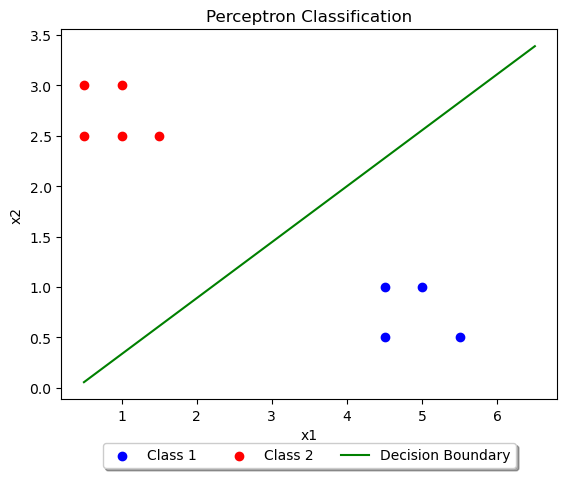

In [42]:
# Plotting the data values and the decision boundary using the above function
plot_perceptron_result(np.array(data1), weights, bias, 1, 2)

2. Train a single perceptron to learn an AND gate with two inputs x1 and x2. 

Assume that all the weights of the perceptron are initialized as 0. 

Show the calculation for each step and also draw the decision boundary for each update.

In [43]:
#Initializing weights with zero
w = np.array([0, 0, 0])
b = 0
#Inputs for learning the AND gate
x = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]]

In [44]:
trans_dataq2 = []

#Flip data values if the data point belongs to class 1 and append -1 as bias vector or just append 1 as bias value if it belongs to class 0
for d in x:
    if d[2] == 0:
        #labels.append(-1)  
        trans_dataq2.append([-d[0], -d[1], -1]) 
    else:
        #labels.append(1) 
        trans_dataq2.append([d[0], d[1], 1])  

In [45]:
weightsq2, biasq2, itersq2 = perceptron(w, trans_dataq2, 1)

Iteration:1
Feature vector:[0, 0]
Current weights:[0 0]
Bias:0
Weighted sum:0
Iteration:2
Feature vector:[0, -1]
Current weights:[0 0]
Bias:-1
Weighted sum:1
Iteration:3
Feature vector:[-1, 0]
Current weights:[0 0]
Bias:-1
Weighted sum:1
Iteration:4
Feature vector:[1, 1]
Current weights:[0 0]
Bias:-1
Weighted sum:-1
Iteration:5
Feature vector:[0, 0]
Current weights:[1 1]
Bias:0
Weighted sum:0
Iteration:6
Feature vector:[0, -1]
Current weights:[1 1]
Bias:-1
Weighted sum:0
Iteration:7
Feature vector:[-1, 0]
Current weights:[1 0]
Bias:-2
Weighted sum:1
Iteration:8
Feature vector:[1, 1]
Current weights:[1 0]
Bias:-2
Weighted sum:-1
Iteration:9
Feature vector:[0, 0]
Current weights:[2 1]
Bias:-1
Weighted sum:1
Iteration:10
Feature vector:[0, -1]
Current weights:[2 1]
Bias:-1
Weighted sum:0
Iteration:11
Feature vector:[-1, 0]
Current weights:[2 0]
Bias:-2
Weighted sum:0
Iteration:12
Feature vector:[1, 1]
Current weights:[1 0]
Bias:-3
Weighted sum:-2
Iteration:13
Feature vector:[0, 0]
Current

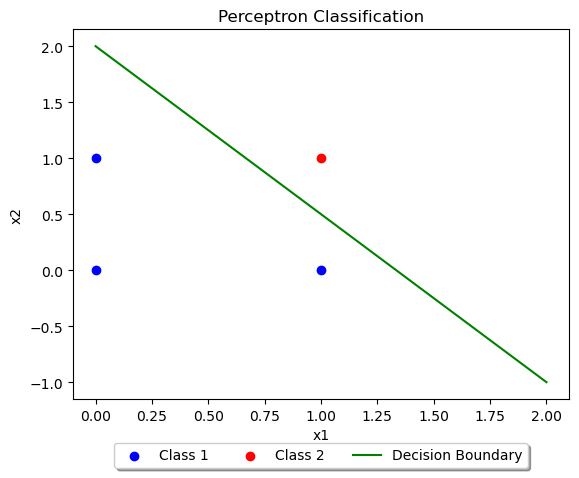

In [46]:
plot_perceptron_result(np.array(x), weightsq2, biasq2, 0, 1)

3. Train a single perceptron to learn the two classes in the following table.

where x1 and x2 are the inputs and ω is the target class. Assume that all the 

weights of the perceptron are initialized as 0 with learning rates 0.001, 0.01, 0.5 

separately. Plot the samples and decision boundary. Also, tabulate the number of 

iterations required to converge the perception algorithm with these two learning 

rates. 


In [47]:
#Writing given data
dataq3 = [[2, 2, 1], [-1, -3, 0], [-1, 2, 1], [0, -1, 0], [1, 3, 1], [1, -2, 0], [-1, -1, 1]]
l1 = 0.001
l2 = 0.01
l3 = 0.5


trans_dataq3 = []

#Flip data values if the data point belongs to class 1 and append -1 as bias vector or just append 1 as bias value if it belongs to class 0
for d in x:
    if d[2] == 0:
        #labels.append(-1)  
        trans_dataq3.append([-d[0], -d[1], -1]) 
    else:
        #labels.append(1) 
        trans_dataq3.append([d[0], d[1], 1])

trans_dataq3 = np.array(trans_dataq3)

Iteration:1
Feature vector:[0 0]
Current weights:[0 0]
Bias:0
Weighted sum:0
Iteration:2
Feature vector:[ 0 -1]
Current weights:[0. 0.]
Bias:-0.001
Weighted sum:0.001
Iteration:3
Feature vector:[-1  0]
Current weights:[0. 0.]
Bias:-0.001
Weighted sum:0.001
Iteration:4
Feature vector:[1 1]
Current weights:[0. 0.]
Bias:-0.001
Weighted sum:-0.001
Iteration:5
Feature vector:[0 0]
Current weights:[0.001 0.001]
Bias:0.0
Weighted sum:0.0
Iteration:6
Feature vector:[ 0 -1]
Current weights:[0.001 0.001]
Bias:-0.001
Weighted sum:0.0
Iteration:7
Feature vector:[-1  0]
Current weights:[0.001 0.   ]
Bias:-0.002
Weighted sum:0.001
Iteration:8
Feature vector:[1 1]
Current weights:[0.001 0.   ]
Bias:-0.002
Weighted sum:-0.001
Iteration:9
Feature vector:[0 0]
Current weights:[0.002 0.001]
Bias:-0.001
Weighted sum:0.001
Iteration:10
Feature vector:[ 0 -1]
Current weights:[0.002 0.001]
Bias:-0.001
Weighted sum:0.0
Iteration:11
Feature vector:[-1  0]
Current weights:[0.002 0.   ]
Bias:-0.002
Weighted sum:

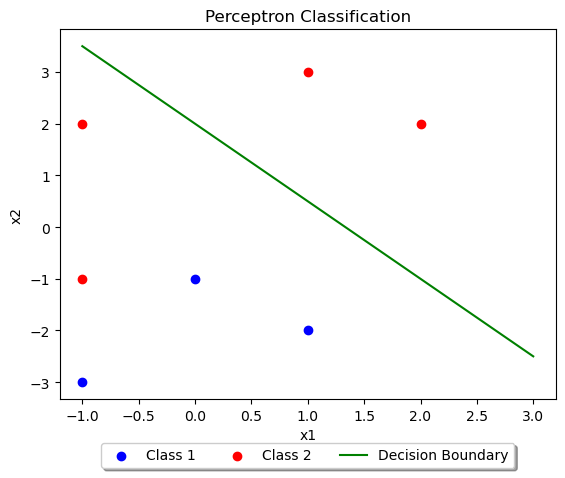

No of iterations for learning rate 0.001 is 34


In [48]:
#Learning rate 0.001
#Initialize weights
w = np.array([0, 0, 0])
b = 0
weights, bias, iters1 = perceptron(w, trans_dataq3, l1)
plot_perceptron_result(np.array(dataq3), weights, bias, 0, 1)
print(f"No of iterations for learning rate {l1} is {iters1}")

Iteration:1
Feature vector:[0 0]
Current weights:[0 0]
Bias:0
Weighted sum:0
Iteration:2
Feature vector:[ 0 -1]
Current weights:[0. 0.]
Bias:-0.01
Weighted sum:0.01
Iteration:3
Feature vector:[-1  0]
Current weights:[0. 0.]
Bias:-0.01
Weighted sum:0.01
Iteration:4
Feature vector:[1 1]
Current weights:[0. 0.]
Bias:-0.01
Weighted sum:-0.01
Iteration:5
Feature vector:[0 0]
Current weights:[0.01 0.01]
Bias:0.0
Weighted sum:0.0
Iteration:6
Feature vector:[ 0 -1]
Current weights:[0.01 0.01]
Bias:-0.01
Weighted sum:0.0
Iteration:7
Feature vector:[-1  0]
Current weights:[0.01 0.  ]
Bias:-0.02
Weighted sum:0.01
Iteration:8
Feature vector:[1 1]
Current weights:[0.01 0.  ]
Bias:-0.02
Weighted sum:-0.01
Iteration:9
Feature vector:[0 0]
Current weights:[0.02 0.01]
Bias:-0.01
Weighted sum:0.01
Iteration:10
Feature vector:[ 0 -1]
Current weights:[0.02 0.01]
Bias:-0.01
Weighted sum:0.0
Iteration:11
Feature vector:[-1  0]
Current weights:[0.02 0.  ]
Bias:-0.02
Weighted sum:0.0
Iteration:12
Feature vect

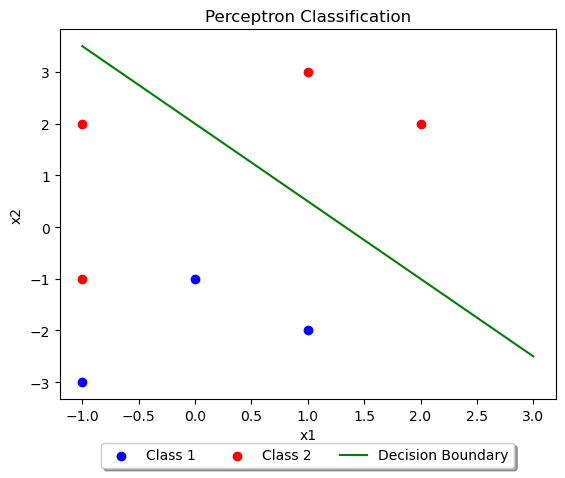

No of iterations for learning rate 0.01 is 34


In [49]:
#Learning rate 0.001
#Initialize weights
w = np.array([0, 0, 0])
b = 0
weights, bias, iters2 = perceptron(w, trans_dataq3, l2)
plot_perceptron_result(np.array(dataq3), weights, bias, 0, 1)
print(f"No of iterations for learning rate {l2} is {iters2}")

Iteration:1
Feature vector:[0 0]
Current weights:[0 0]
Bias:0
Weighted sum:0
Iteration:2
Feature vector:[ 0 -1]
Current weights:[0. 0.]
Bias:-0.5
Weighted sum:0.5
Iteration:3
Feature vector:[-1  0]
Current weights:[0. 0.]
Bias:-0.5
Weighted sum:0.5
Iteration:4
Feature vector:[1 1]
Current weights:[0. 0.]
Bias:-0.5
Weighted sum:-0.5
Iteration:5
Feature vector:[0 0]
Current weights:[0.5 0.5]
Bias:0.0
Weighted sum:0.0
Iteration:6
Feature vector:[ 0 -1]
Current weights:[0.5 0.5]
Bias:-0.5
Weighted sum:0.0
Iteration:7
Feature vector:[-1  0]
Current weights:[0.5 0. ]
Bias:-1.0
Weighted sum:0.5
Iteration:8
Feature vector:[1 1]
Current weights:[0.5 0. ]
Bias:-1.0
Weighted sum:-0.5
Iteration:9
Feature vector:[0 0]
Current weights:[1.  0.5]
Bias:-0.5
Weighted sum:0.5
Iteration:10
Feature vector:[ 0 -1]
Current weights:[1.  0.5]
Bias:-0.5
Weighted sum:0.0
Iteration:11
Feature vector:[-1  0]
Current weights:[1. 0.]
Bias:-1.0
Weighted sum:0.0
Iteration:12
Feature vector:[1 1]
Current weights:[0.5 0

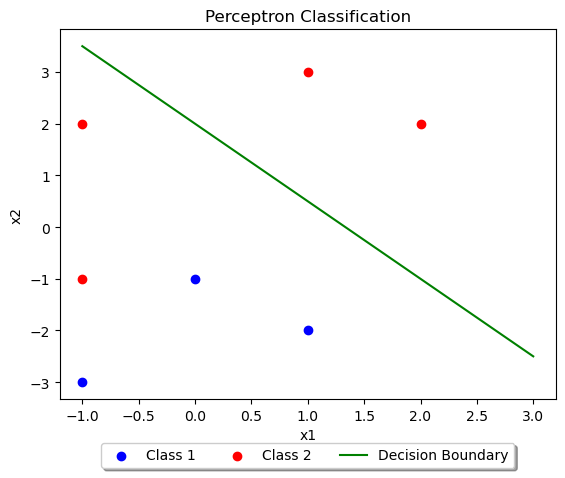

No of iterations for learning rate 0.5 is 34


In [50]:
#Learning rate 0.5
#Initialize weights
w = np.array([0, 0, 0])
b = 0
weights, bias, iters3 = perceptron(w, trans_dataq3, l3)
plot_perceptron_result(np.array(dataq3), weights, bias, 0, 1)
print(f"No of iterations for learning rate {l3} is {iters3}")

4. From the iris dataset, choose the ’petal length’, ’sepal width’ for “setosa” and  

“virginica” flowers. Learn a decision boundary for the two features using a single 

perceptron. Assume that all the weights of the perceptron are initialized as 0 with 

the learning rate of 0.01. Output the final weight vector and plot the samples and 

the decision boundary.

[Note: Use iris.csv file in the attachments.]

In [51]:
#Read the dataset into a dataframe. 
iris_df = pd.read_csv('iris.csv')
iris_df.head()
#iris_df['Species'].unique()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
#Here classification is based on setosa and virginica
#So drop veriscolor features
df = iris_df[iris_df['Species'] != 'Iris-versicolor']
df = df[['SepalLengthCm', 'SepalWidthCm', 'Species']]

#Label virginica as 1 and setosa as 0
df['Label'] = df['Species'].apply(lambda x: 1 if x == 'Iris-virginica' else 0)
df = df.drop(columns = ['Species'])

#Add bias column and flip the negative value for class 0
df['Bias'] = 1
df.loc[df['Label'] == 0, ['SepalLengthCm', 'SepalWidthCm', 'Bias']] *= -1
df

,SepalLengthCm,SepalWidthCm,Label,Bias
0,-5.1,-3.5,0,-1
1,-4.9,-3.0,0,-1
2,-4.7,-3.2,0,-1
3,-4.6,-3.1,0,-1
4,-5.0,-3.6,0,-1
...,...,...,...,...
145,6.7,3.0,1,1
146,6.3,2.5,1,1
147,6.5,3.0,1,1
148,6.2,3.4,1,1


In [53]:
#Convert into numpy array for using the data in perceptron function
data = np.array(df[['SepalLengthCm' ,'SepalWidthCm', 'Bias']])
weight = np.array([0, 0, 0])
w, b, iters = perceptron(weight, data, 0.01)
print(f"No of iterations is {iters}")

Iteration:1
Feature vector:[-5.1 -3.5]
Current weights:[0 0]
Bias:0
Weighted sum:0.0
Iteration:2
Feature vector:[-4.9 -3. ]
Current weights:[-0.051 -0.035]
Bias:-0.01
Weighted sum:0.3649
Iteration:3
Feature vector:[-4.7 -3.2]
Current weights:[-0.051 -0.035]
Bias:-0.01
Weighted sum:0.3617
Iteration:4
Feature vector:[-4.6 -3.1]
Current weights:[-0.051 -0.035]
Bias:-0.01
Weighted sum:0.35309999999999997
Iteration:5
Feature vector:[-5.  -3.6]
Current weights:[-0.051 -0.035]
Bias:-0.01
Weighted sum:0.391
Iteration:6
Feature vector:[-5.4 -3.9]
Current weights:[-0.051 -0.035]
Bias:-0.01
Weighted sum:0.4219
Iteration:7
Feature vector:[-4.6 -3.4]
Current weights:[-0.051 -0.035]
Bias:-0.01
Weighted sum:0.3636
Iteration:8
Feature vector:[-5.  -3.4]
Current weights:[-0.051 -0.035]
Bias:-0.01
Weighted sum:0.384
Iteration:9
Feature vector:[-4.4 -2.9]
Current weights:[-0.051 -0.035]
Bias:-0.01
Weighted sum:0.33590000000000003
Iteration:10
Feature vector:[-4.9 -3.1]
Current weights:[-0.051 -0.035]
Bia

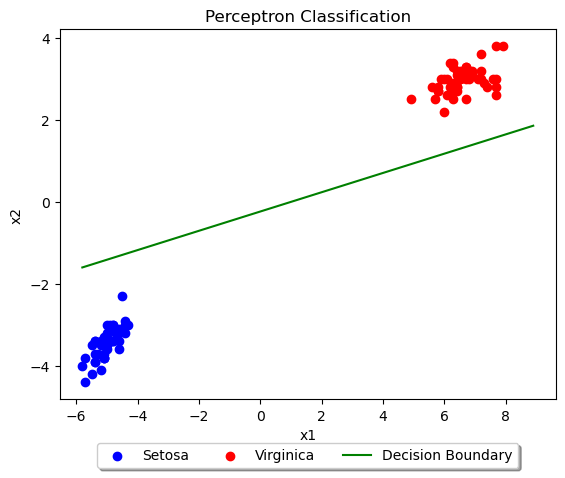

In [54]:
# Function to plot data points and decision boundary
def plot_perceptron_result(original_data, weights, bias):

    # Separate the original data based on labels
    # Setosa (Label 0)
    class1 = original_data[original_data[:, 2] == 0]
    # Virginica (Label 1)
    class2 = original_data[original_data[:, 2] == 1]  

    # Plotting data points
    plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Setosa')
    plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Virginica')

    # Generating decision boundary x-values
    x_values = np.linspace(min(original_data[:, 0]), max(original_data[:, 0]) + 1, 100)

    # Calculate the corresponding y-values for the decision boundary
    y_values = -(weights[0] * x_values + bias) / weights[1]

    # Plotting the decision boundary
    plt.plot(x_values, y_values, label='Decision Boundary', color='green')

    # Setting labels and title
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=3)    
    plt.title('Perceptron Classification')
    plt.show()


# For plotting, use the  labels
plot_data = np.array(df[['SepalLengthCm', 'SepalWidthCm', 'Label']])

# Call the plot function with original labels for proper class separation
plot_perceptron_result(plot_data, w, b)
